In [1]:
import pypsa

import pandas as pd

n = pypsa.Network("pypsa-eur-test/results/networks/elec_s_37_ec_lcopt_Co2L0.7-24H.nc")

print(n)

INFO:pypsa.io:Imported network elec_s_37_ec_lcopt_Co2L0.7-24H.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores


PyPSA Network
Components:
 - Bus: 111
 - Carrier: 26
 - Generator: 326
 - GlobalConstraint: 1
 - Line: 52
 - Link: 198
 - Load: 37
 - Shape: 123
 - StorageUnit: 50
 - Store: 74
Snapshots: 366


(<matplotlib.collections.PatchCollection at 0x14e4e4d50>,
 <matplotlib.collections.LineCollection at 0x14e4deb10>)

/opt/anaconda3/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



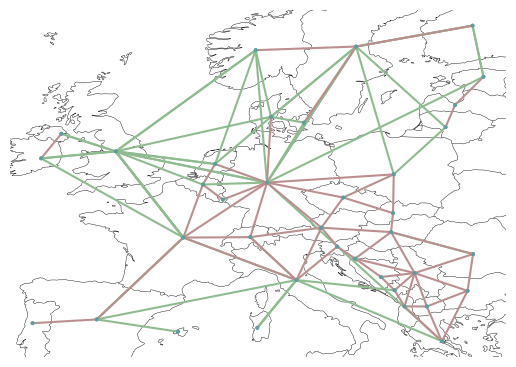

In [2]:
n.plot()

In [3]:
n.add("Carrier", "SBSP", co2_emissions=0.0036)

ac_buses = n.buses[n.buses['carrier'] == 'AC']

for bus in ac_buses.index:
    n.add("Generator", f"SBSP Generator at {bus}", 
          bus=bus,  
          carrier="SBSP",  
          p_nom=0,  # MW
          marginal_cost=0.0,  # EUR/MWh
          capital_cost=384852.0,  # EUR/MW
          p_max_pu=1, 
          p_min_pu=0,  
          p_nom_extendable=True  
         )

In [4]:
committable_carriers = ["oil", "biomass", "nuclear", "ror", "lignite", "coal", "geothermal"]

for gen_id, generator in n.generators.iterrows():
    if generator['carrier'] in committable_carriers:
        n.generators.at[gen_id, 'committable'] = True

In [5]:
n.generators

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,p_nom_max,p_max_pu,...,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
AL1 0 offwind-ac,offwind-ac,AL1 0,0.000000,0.000000,True,0.500,5.010393,241596.206534,2.804437e+03,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 offwind-float,offwind-float,AL1 0,0.000000,0.000000,True,0.500,5.009572,256506.087174,7.592113e+03,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 oil,oil,AL1 0,89.854543,89.854543,False,0.350,157.564261,40382.063710,inf,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 onwind,onwind,AL1 0,0.000000,0.000000,True,0.425,2.123403,108625.310225,6.780099e+04,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
AL1 0 ror,ror,AL1 0,0.000000,48.200000,False,0.900,0.010439,308170.371903,inf,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBSP Generator at RO1 0,SBSP,RO1 0,0.000000,0.000000,True,1.000,0.000000,384852.000000,inf,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
SBSP Generator at RS1 0,SBSP,RS1 0,0.000000,0.000000,True,1.000,0.000000,384852.000000,inf,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0
SBSP Generator at SE2 0,SBSP,SE2 0,0.000000,0.000000,True,1.000,0.000000,384852.000000,inf,1.0,...,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0


In [6]:
n.carriers

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
AC,0.000000,#70af1d,AC,inf,0.0
DC,0.000000,#8a1caf,DC,inf,0.0
oil,0.294000,#c9c9c9,oil,inf,0.0
geothermal,0.035283,#ba91b1,geothermal,inf,0.0
lignite,0.406900,#826837,lignite,inf,0.0
CCGT,0.240000,#a85522,Combined-Cycle Gas,inf,0.0
nuclear,0.004743,#ff8c00,nuclear,inf,0.0
OCGT,0.240000,#e0986c,Open-Cycle Gas,inf,0.0
coal,0.336100,#545454,coal,inf,0.0


In [7]:
snapshots_to_optimize = n.snapshots[:366]

n.optimize(snapshots=snapshots_to_optimize, solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████████████| 3/3 [00:00<00:00, 59.53it/s]
INFO:linopy.io: Writing time: 3.92s


Read LP format model from file /private/var/folders/gy/z7x44kpn24d18spbg3w6_5fr0000gn/T/linopy-problem-hvqnrw4u.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/gy/z7x44kpn24d18spbg3w6_5fr0000gn/T/linopy-problem-hvqnrw4u.lp


Reading time = 1.56 seconds


INFO:gurobipy:Reading time = 1.56 seconds


obj: 785182 rows, 459856 columns, 1745694 nonzeros


INFO:gurobipy:obj: 785182 rows, 459856 columns, 1745694 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.5.0 23F79)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.5.0 23F79)


INFO:gurobipy:


CPU model: Apple M1


INFO:gurobipy:CPU model: Apple M1


Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 785182 rows, 459856 columns and 1745694 nonzeros


INFO:gurobipy:Optimize a model with 785182 rows, 459856 columns and 1745694 nonzeros


Model fingerprint: 0xf02b3299


INFO:gurobipy:Model fingerprint: 0xf02b3299


Variable types: 343468 continuous, 116388 integer (116388 binary)


INFO:gurobipy:Variable types: 343468 continuous, 116388 integer (116388 binary)


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-02, 4e+04]


INFO:gurobipy:  Matrix range     [1e-02, 4e+04]


  Objective range  [2e-01, 4e+05]


INFO:gurobipy:  Objective range  [2e-01, 4e+05]


  Bounds range     [1e-01, 4e+10]


INFO:gurobipy:  Bounds range     [1e-01, 4e+10]


  RHS range        [1e-01, 1e+09]


INFO:gurobipy:  RHS range        [1e-01, 1e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 496759 rows and 156491 columns


INFO:gurobipy:Presolve removed 496759 rows and 156491 columns


Presolve time: 1.79s


INFO:gurobipy:Presolve time: 1.79s


Presolved: 288423 rows, 303365 columns, 1000646 nonzeros


INFO:gurobipy:Presolved: 288423 rows, 303365 columns, 1000646 nonzeros


Variable types: 303365 continuous, 0 integer (0 binary)


INFO:gurobipy:Variable types: 303365 continuous, 0 integer (0 binary)


Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Root barrier log...


INFO:gurobipy:Root barrier log...


INFO:gurobipy:


Ordering time: 3.51s


INFO:gurobipy:Ordering time: 3.51s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 512


INFO:gurobipy: Dense cols : 512


 AA' NZ     : 8.673e+05


INFO:gurobipy: AA' NZ     : 8.673e+05


 Factor NZ  : 1.036e+07 (roughly 300 MB of memory)


INFO:gurobipy: Factor NZ  : 1.036e+07 (roughly 300 MB of memory)


 Factor Ops : 7.210e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.210e+09 (less than 1 second per iteration)


 Threads    : 6


INFO:gurobipy: Threads    : 6


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.76628639e+14 -4.08135410e+15  2.02e+10 4.95e+03  1.04e+12     8s


INFO:gurobipy:   0   3.76628639e+14 -4.08135410e+15  2.02e+10 4.95e+03  1.04e+12     8s


   1   4.18695167e+14 -3.29025071e+15  1.57e+10 4.90e+05  6.69e+11     9s


INFO:gurobipy:   1   4.18695167e+14 -3.29025071e+15  1.57e+10 4.90e+05  6.69e+11     9s


   2   2.52676570e+14 -2.68314327e+15  9.96e+09 7.36e+04  3.64e+11     9s


INFO:gurobipy:   2   2.52676570e+14 -2.68314327e+15  9.96e+09 7.36e+04  3.64e+11     9s


   3   1.17593953e+14 -2.24031151e+15  1.46e+09 1.22e+04  5.85e+10    10s


INFO:gurobipy:   3   1.17593953e+14 -2.24031151e+15  1.46e+09 1.22e+04  5.85e+10    10s


   4   8.76607940e+13 -1.32481599e+15  5.16e+07 7.42e+02  3.91e+09    11s


INFO:gurobipy:   4   8.76607940e+13 -1.32481599e+15  5.16e+07 7.42e+02  3.91e+09    11s


   5   3.41016848e+13 -2.17881405e+14  2.16e+06 3.31e+01  3.95e+08    11s


INFO:gurobipy:   5   3.41016848e+13 -2.17881405e+14  2.16e+06 3.31e+01  3.95e+08    11s


   6   9.71485036e+12 -1.22032365e+14  2.38e+02 1.72e+01  1.87e+08    12s


INFO:gurobipy:   6   9.71485036e+12 -1.22032365e+14  2.38e+02 1.72e+01  1.87e+08    12s


   7   6.38185267e+12 -6.37446830e+13  1.08e+02 6.77e+00  9.81e+07    12s


INFO:gurobipy:   7   6.38185267e+12 -6.37446830e+13  1.08e+02 6.77e+00  9.81e+07    12s


   8   3.69873182e+12 -3.59497918e+13  3.27e+01 3.71e+00  5.49e+07    12s


INFO:gurobipy:   8   3.69873182e+12 -3.59497918e+13  3.27e+01 3.71e+00  5.49e+07    12s


   9   2.14049792e+12 -1.78949833e+13  7.45e+00 7.76e-01  2.76e+07    13s


INFO:gurobipy:   9   2.14049792e+12 -1.78949833e+13  7.45e+00 7.76e-01  2.76e+07    13s


  10   1.31794221e+12 -7.39724987e+12  2.41e+00 1.26e-06  1.20e+07    13s


INFO:gurobipy:  10   1.31794221e+12 -7.39724987e+12  2.41e+00 1.26e-06  1.20e+07    13s


  11   8.52165428e+11 -2.86801807e+12  1.07e+00 4.56e-07  5.09e+06    14s


INFO:gurobipy:  11   8.52165428e+11 -2.86801807e+12  1.07e+00 4.56e-07  5.09e+06    14s


  12   5.39279596e+11 -1.59566114e+12  5.44e-01 2.41e-07  2.92e+06    15s


INFO:gurobipy:  12   5.39279596e+11 -1.59566114e+12  5.44e-01 2.41e-07  2.92e+06    15s


  13   3.67897926e+11 -8.50840688e+11  3.03e-01 1.36e-07  1.66e+06    15s


INFO:gurobipy:  13   3.67897926e+11 -8.50840688e+11  3.03e-01 1.36e-07  1.66e+06    15s


  14   2.95088595e+11 -5.33288890e+11  2.19e-01 8.59e-08  1.13e+06    15s


INFO:gurobipy:  14   2.95088595e+11 -5.33288890e+11  2.19e-01 8.59e-08  1.13e+06    15s


  15   2.49870442e+11 -3.98084963e+11  1.72e-01 6.57e-08  8.84e+05    16s


INFO:gurobipy:  15   2.49870442e+11 -3.98084963e+11  1.72e-01 6.57e-08  8.84e+05    16s


  16   1.89588590e+11 -1.69292292e+11  1.15e-01 2.94e-08  4.90e+05    16s


INFO:gurobipy:  16   1.89588590e+11 -1.69292292e+11  1.15e-01 2.94e-08  4.90e+05    16s


  17   1.44912450e+11 -6.49181248e+10  7.74e-02 1.36e-08  2.86e+05    17s


INFO:gurobipy:  17   1.44912450e+11 -6.49181248e+10  7.74e-02 1.36e-08  2.86e+05    17s


  18   1.17578938e+11 -1.93347673e+10  5.51e-02 9.55e-09  1.87e+05    17s


INFO:gurobipy:  18   1.17578938e+11 -1.93347673e+10  5.51e-02 9.55e-09  1.87e+05    17s


  19   9.88945126e+10  1.98525817e+08  4.04e-02 7.92e-09  1.35e+05    18s


INFO:gurobipy:  19   9.88945126e+10  1.98525817e+08  4.04e-02 7.92e-09  1.35e+05    18s


  20   8.62002174e+10  1.75267970e+10  3.03e-02 6.81e-09  9.36e+04    18s


INFO:gurobipy:  20   8.62002174e+10  1.75267970e+10  3.03e-02 6.81e-09  9.36e+04    18s


  21   7.20812174e+10  3.00862382e+10  1.93e-02 6.98e-09  5.73e+04    19s


INFO:gurobipy:  21   7.20812174e+10  3.00862382e+10  1.93e-02 6.98e-09  5.73e+04    19s


  22   6.13111711e+10  3.97354509e+10  1.12e-02 9.08e-09  2.94e+04    19s


INFO:gurobipy:  22   6.13111711e+10  3.97354509e+10  1.12e-02 9.08e-09  2.94e+04    19s


  23   5.64834155e+10  4.25339996e+10  7.52e-03 8.15e-09  1.90e+04    20s


INFO:gurobipy:  23   5.64834155e+10  4.25339996e+10  7.52e-03 8.15e-09  1.90e+04    20s


  24   5.37969182e+10  4.36936937e+10  5.44e-03 8.85e-09  1.38e+04    20s


INFO:gurobipy:  24   5.37969182e+10  4.36936937e+10  5.44e-03 8.85e-09  1.38e+04    20s


  25   5.19019423e+10  4.43888668e+10  4.01e-03 7.22e-09  1.02e+04    21s


INFO:gurobipy:  25   5.19019423e+10  4.43888668e+10  4.01e-03 7.22e-09  1.02e+04    21s


  26   5.04104982e+10  4.48495389e+10  2.88e-03 5.12e-09  7.58e+03    21s


INFO:gurobipy:  26   5.04104982e+10  4.48495389e+10  2.88e-03 5.12e-09  7.58e+03    21s


  27   4.95238404e+10  4.54285059e+10  2.27e-03 7.92e-09  5.58e+03    21s


INFO:gurobipy:  27   4.95238404e+10  4.54285059e+10  2.27e-03 7.92e-09  5.58e+03    21s


  28   4.82239217e+10  4.56578029e+10  1.37e-03 4.66e-09  3.50e+03    22s


INFO:gurobipy:  28   4.82239217e+10  4.56578029e+10  1.37e-03 4.66e-09  3.50e+03    22s


  29   4.75449343e+10  4.58866867e+10  9.02e-04 1.21e-08  2.26e+03    23s


INFO:gurobipy:  29   4.75449343e+10  4.58866867e+10  9.02e-04 1.21e-08  2.26e+03    23s


  30   4.71723393e+10  4.60160959e+10  6.38e-04 2.14e-08  1.58e+03    23s


INFO:gurobipy:  30   4.71723393e+10  4.60160959e+10  6.38e-04 2.14e-08  1.58e+03    23s


  31   4.70722707e+10  4.60670131e+10  5.66e-04 1.82e-08  1.37e+03    23s


INFO:gurobipy:  31   4.70722707e+10  4.60670131e+10  5.66e-04 1.82e-08  1.37e+03    23s


  32   4.68167947e+10  4.61364267e+10  3.87e-04 7.45e-09  9.28e+02    24s


INFO:gurobipy:  32   4.68167947e+10  4.61364267e+10  3.87e-04 7.45e-09  9.28e+02    24s


  33   4.66498455e+10  4.62040473e+10  2.68e-04 7.45e-09  6.08e+02    24s


INFO:gurobipy:  33   4.66498455e+10  4.62040473e+10  2.68e-04 7.45e-09  6.08e+02    24s


  34   4.65723648e+10  4.62135568e+10  2.16e-04 5.59e-09  4.89e+02    25s


INFO:gurobipy:  34   4.65723648e+10  4.62135568e+10  2.16e-04 5.59e-09  4.89e+02    25s


  35   4.64410133e+10  4.62304620e+10  1.26e-04 5.59e-09  2.87e+02    25s


INFO:gurobipy:  35   4.64410133e+10  4.62304620e+10  1.26e-04 5.59e-09  2.87e+02    25s


  36   4.64083395e+10  4.62399836e+10  1.02e-04 4.66e-09  2.30e+02    26s


INFO:gurobipy:  36   4.64083395e+10  4.62399836e+10  1.02e-04 4.66e-09  2.30e+02    26s


  37   4.63757348e+10  4.62462199e+10  7.86e-05 4.66e-09  1.77e+02    26s


INFO:gurobipy:  37   4.63757348e+10  4.62462199e+10  7.86e-05 4.66e-09  1.77e+02    26s


  38   4.63397550e+10  4.62510287e+10  5.42e-05 6.05e-09  1.21e+02    27s


INFO:gurobipy:  38   4.63397550e+10  4.62510287e+10  5.42e-05 6.05e-09  1.21e+02    27s


  39   4.63175749e+10  4.62560378e+10  3.82e-05 6.05e-09  8.39e+01    27s


INFO:gurobipy:  39   4.63175749e+10  4.62560378e+10  3.82e-05 6.05e-09  8.39e+01    27s


  40   4.62897007e+10  4.62576552e+10  1.81e-05 3.73e-09  4.37e+01    28s


INFO:gurobipy:  40   4.62897007e+10  4.62576552e+10  1.81e-05 3.73e-09  4.37e+01    28s


  41   4.62748738e+10  4.62596198e+10  7.60e-06 3.73e-09  2.08e+01    28s


INFO:gurobipy:  41   4.62748738e+10  4.62596198e+10  7.60e-06 3.73e-09  2.08e+01    28s


  42   4.62722790e+10  4.62610211e+10  6.20e-06 2.44e-09  1.53e+01    29s


INFO:gurobipy:  42   4.62722790e+10  4.62610211e+10  6.20e-06 2.44e-09  1.53e+01    29s


  43   4.62705347e+10  4.62624983e+10  5.18e-06 2.33e-09  1.10e+01    29s


INFO:gurobipy:  43   4.62705347e+10  4.62624983e+10  5.18e-06 2.33e-09  1.10e+01    29s


  44   4.62690303e+10  4.62630108e+10  4.42e-06 2.33e-09  8.21e+00    30s


INFO:gurobipy:  44   4.62690303e+10  4.62630108e+10  4.42e-06 2.33e-09  8.21e+00    30s


  45   4.62656133e+10  4.62634049e+10  1.80e-06 6.05e-09  3.01e+00    30s


INFO:gurobipy:  45   4.62656133e+10  4.62634049e+10  1.80e-06 6.05e-09  3.01e+00    30s


  46   4.62646101e+10  4.62635969e+10  1.28e-06 4.19e-09  1.38e+00    31s


INFO:gurobipy:  46   4.62646101e+10  4.62635969e+10  1.28e-06 4.19e-09  1.38e+00    31s


  47   4.62644167e+10  4.62636939e+10  9.54e-07 7.45e-09  9.85e-01    31s


INFO:gurobipy:  47   4.62644167e+10  4.62636939e+10  9.54e-07 7.45e-09  9.85e-01    31s


  48   4.62641478e+10  4.62637625e+10  1.19e-06 1.72e-08  5.25e-01    32s


INFO:gurobipy:  48   4.62641478e+10  4.62637625e+10  1.19e-06 1.72e-08  5.25e-01    32s


  49   4.62640513e+10  4.62637918e+10  8.77e-07 1.12e-08  3.54e-01    32s


INFO:gurobipy:  49   4.62640513e+10  4.62637918e+10  8.77e-07 1.12e-08  3.54e-01    32s


  50   4.62639058e+10  4.62638091e+10  1.08e-06 6.29e-09  1.32e-01    33s


INFO:gurobipy:  50   4.62639058e+10  4.62638091e+10  1.08e-06 6.29e-09  1.32e-01    33s


  51   4.62638643e+10  4.62638283e+10  3.90e-07 2.10e-09  4.91e-02    34s


INFO:gurobipy:  51   4.62638643e+10  4.62638283e+10  3.90e-07 2.10e-09  4.91e-02    34s


  52   4.62638539e+10  4.62638363e+10  2.14e-07 2.33e-09  2.39e-02    34s


INFO:gurobipy:  52   4.62638539e+10  4.62638363e+10  2.14e-07 2.33e-09  2.39e-02    34s


  53   4.62638479e+10  4.62638387e+10  1.11e-07 3.73e-09  1.26e-02    35s


INFO:gurobipy:  53   4.62638479e+10  4.62638387e+10  1.11e-07 3.73e-09  1.26e-02    35s


  54   4.62638429e+10  4.62638404e+10  1.49e-06 2.79e-09  3.34e-03    36s


INFO:gurobipy:  54   4.62638429e+10  4.62638404e+10  1.49e-06 2.79e-09  3.34e-03    36s


  55   4.62638411e+10  4.62638409e+10  9.31e-07 3.26e-09  1.58e-04    36s


INFO:gurobipy:  55   4.62638411e+10  4.62638409e+10  9.31e-07 3.26e-09  1.58e-04    36s


  56   4.62638411e+10  4.62638410e+10  2.79e-06 3.26e-09  3.66e-05    37s


INFO:gurobipy:  56   4.62638411e+10  4.62638410e+10  2.79e-06 3.26e-09  3.66e-05    37s


  57   4.62638410e+10  4.62638410e+10  9.09e-07 2.33e-09  8.68e-06    38s


INFO:gurobipy:  57   4.62638410e+10  4.62638410e+10  9.09e-07 2.33e-09  8.68e-06    38s


  58   4.62638410e+10  4.62638410e+10  8.25e-08 3.26e-09  1.79e-07    38s


INFO:gurobipy:  58   4.62638410e+10  4.62638410e+10  8.25e-08 3.26e-09  1.79e-07    38s


  59   4.62638410e+10  4.62638410e+10  3.69e-10 3.73e-09  4.62e-10    39s


INFO:gurobipy:  59   4.62638410e+10  4.62638410e+10  3.69e-10 3.73e-09  4.62e-10    39s


INFO:gurobipy:


Barrier solved model in 59 iterations and 38.91 seconds (23.71 work units)


INFO:gurobipy:Barrier solved model in 59 iterations and 38.91 seconds (23.71 work units)


Optimal objective 4.62638410e+10


INFO:gurobipy:Optimal objective 4.62638410e+10


INFO:gurobipy:


INFO:gurobipy:


Root crossover log...


INFO:gurobipy:Root crossover log...


INFO:gurobipy:


  148877 DPushes remaining with DInf 0.0000000e+00                39s


INFO:gurobipy:  148877 DPushes remaining with DInf 0.0000000e+00                39s


   22784 DPushes remaining with DInf 0.0000000e+00                51s


INFO:gurobipy:   22784 DPushes remaining with DInf 0.0000000e+00                51s


       0 DPushes remaining with DInf 0.0000000e+00                54s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                54s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


    2294 PPushes remaining with PInf 0.0000000e+00                54s


INFO:gurobipy:    2294 PPushes remaining with PInf 0.0000000e+00                54s


       0 PPushes remaining with PInf 0.0000000e+00                55s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                55s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2921523e-08     55s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2921523e-08     55s


INFO:gurobipy:


INFO:gurobipy:


Root simplex log...


INFO:gurobipy:Root simplex log...


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  110167    4.6263841e+10   0.000000e+00   0.000000e+00     55s


INFO:gurobipy:  110167    4.6263841e+10   0.000000e+00   0.000000e+00     55s


Concurrent spin time: 17.48s (can be avoided by choosing Method=3)


INFO:gurobipy:Concurrent spin time: 17.48s (can be avoided by choosing Method=3)


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


INFO:gurobipy:


Root relaxation: objective 4.626384e+10, 110167 iterations, 69.86 seconds (34.26 work units)


INFO:gurobipy:Root relaxation: objective 4.626384e+10, 110167 iterations, 69.86 seconds (34.26 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


*    0     0               0    4.626384e+10 4.6264e+10  0.00%     -   72s


INFO:gurobipy:*    0     0               0    4.626384e+10 4.6264e+10  0.00%     -   72s


INFO:gurobipy:


Explored 1 nodes (110167 simplex iterations) in 72.74 seconds (38.68 work units)


INFO:gurobipy:Explored 1 nodes (110167 simplex iterations) in 72.74 seconds (38.68 work units)


Thread count was 8 (of 8 available processors)


INFO:gurobipy:Thread count was 8 (of 8 available processors)


INFO:gurobipy:


Solution count 1: 4.62638e+10 


INFO:gurobipy:Solution count 1: 4.62638e+10 


INFO:gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 4.626384104037e+10, best bound 4.626384104037e+10, gap 0.0000%


INFO:gurobipy:Best objective 4.626384104037e+10, best bound 4.626384104037e+10, gap 0.0000%
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 459856 primals, 0 duals
Objective: 4.63e+10
Solver model: available
Solver message: 2

/opt/anaconda3/lib/python3.11/site-packages/pypsa/optimization/optimize.py:357: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



INFO:pypsa.optimization.optimize:No shadow prices were assigned to the network.


('ok', 'optimal')

In [8]:
import pandas as pd
generation_data = n.generators_t.p

carrier_generation = pd.Series(0.0, index=n.generators.carrier.unique())

for gen_id, generator in n.generators.iterrows():
    carrier = generator['carrier']
    carrier_generation[carrier] += generation_data[gen_id].sum()

print(carrier_generation)

offwind-ac       1.331202e+06
offwind-float    9.307869e+05
oil              0.000000e+00
onwind           1.858887e+07
ror              7.002640e+06
solar            7.867716e+06
solar-hsat       1.054326e+07
CCGT             2.781672e+06
coal             1.985444e+07
lignite          1.456889e+07
biomass          6.151714e+06
nuclear          3.338916e+07
offwind-dc       2.739350e+06
OCGT             0.000000e+00
geothermal       3.577000e+04
SBSP             0.000000e+00
dtype: float64


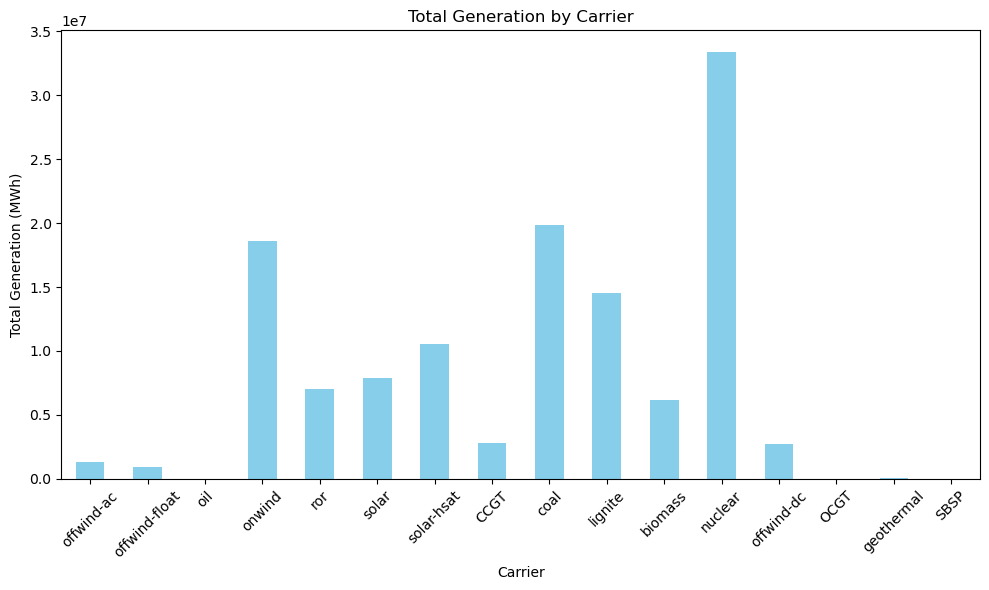

In [10]:
import matplotlib.pyplot as plt
carrier_generation.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Generation by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Total Generation (MWh)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [11]:
new_capital_cost = 320000.0 

for gen_id, generator in n.generators.iterrows():
    if generator['carrier'] == 'SBSP':
        n.generators.at[gen_id, 'capital_cost'] = new_capital_cost

In [12]:
snapshots_to_optimize = n.snapshots[:366]

n.optimize(snapshots=snapshots_to_optimize, solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████████████| 3/3 [00:00<00:00, 59.06it/s]
INFO:linopy.io: Writing time: 3.96s


Read LP format model from file /private/var/folders/gy/z7x44kpn24d18spbg3w6_5fr0000gn/T/linopy-problem-lkio6u1s.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/gy/z7x44kpn24d18spbg3w6_5fr0000gn/T/linopy-problem-lkio6u1s.lp


Reading time = 1.50 seconds


INFO:gurobipy:Reading time = 1.50 seconds


obj: 785182 rows, 459856 columns, 1745694 nonzeros


INFO:gurobipy:obj: 785182 rows, 459856 columns, 1745694 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.5.0 23F79)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.5.0 23F79)


INFO:gurobipy:


CPU model: Apple M1


INFO:gurobipy:CPU model: Apple M1


Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 785182 rows, 459856 columns and 1745694 nonzeros


INFO:gurobipy:Optimize a model with 785182 rows, 459856 columns and 1745694 nonzeros


Model fingerprint: 0xbea90314


INFO:gurobipy:Model fingerprint: 0xbea90314


Variable types: 343468 continuous, 116388 integer (116388 binary)


INFO:gurobipy:Variable types: 343468 continuous, 116388 integer (116388 binary)


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-02, 4e+04]


INFO:gurobipy:  Matrix range     [1e-02, 4e+04]


  Objective range  [2e-01, 3e+05]


INFO:gurobipy:  Objective range  [2e-01, 3e+05]


  Bounds range     [1e-01, 4e+10]


INFO:gurobipy:  Bounds range     [1e-01, 4e+10]


  RHS range        [1e-01, 1e+09]


INFO:gurobipy:  RHS range        [1e-01, 1e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 496759 rows and 156491 columns


INFO:gurobipy:Presolve removed 496759 rows and 156491 columns


Presolve time: 1.78s


INFO:gurobipy:Presolve time: 1.78s


Presolved: 288423 rows, 303365 columns, 1000646 nonzeros


INFO:gurobipy:Presolved: 288423 rows, 303365 columns, 1000646 nonzeros


Variable types: 303365 continuous, 0 integer (0 binary)


INFO:gurobipy:Variable types: 303365 continuous, 0 integer (0 binary)


Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Root barrier log...


INFO:gurobipy:Root barrier log...


INFO:gurobipy:


Ordering time: 3.19s


INFO:gurobipy:Ordering time: 3.19s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 512


INFO:gurobipy: Dense cols : 512


 AA' NZ     : 8.673e+05


INFO:gurobipy: AA' NZ     : 8.673e+05


 Factor NZ  : 1.085e+07 (roughly 300 MB of memory)


INFO:gurobipy: Factor NZ  : 1.085e+07 (roughly 300 MB of memory)


 Factor Ops : 9.159e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.159e+09 (less than 1 second per iteration)


 Threads    : 6


INFO:gurobipy: Threads    : 6


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.74556940e+14 -4.08150025e+15  2.02e+10 4.96e+03  1.04e+12     8s


INFO:gurobipy:   0   3.74556940e+14 -4.08150025e+15  2.02e+10 4.96e+03  1.04e+12     8s


   1   4.16088797e+14 -3.29036643e+15  1.57e+10 4.90e+05  6.69e+11     8s


INFO:gurobipy:   1   4.16088797e+14 -3.29036643e+15  1.57e+10 4.90e+05  6.69e+11     8s


   2   2.49081314e+14 -2.68341755e+15  9.96e+09 7.38e+04  3.64e+11     9s


INFO:gurobipy:   2   2.49081314e+14 -2.68341755e+15  9.96e+09 7.38e+04  3.64e+11     9s


   3   1.09007098e+14 -2.24087412e+15  1.46e+09 1.23e+04  5.87e+10     9s


INFO:gurobipy:   3   1.09007098e+14 -2.24087412e+15  1.46e+09 1.23e+04  5.87e+10     9s


   4   8.25453804e+13 -1.32566642e+15  5.14e+07 7.28e+02  3.90e+09    10s


INFO:gurobipy:   4   8.25453804e+13 -1.32566642e+15  5.14e+07 7.28e+02  3.90e+09    10s


   5   3.30728439e+13 -1.93489826e+14  2.11e+06 2.36e+01  3.56e+08    11s


INFO:gurobipy:   5   3.30728439e+13 -1.93489826e+14  2.11e+06 2.36e+01  3.56e+08    11s


   6   1.11097000e+13 -6.04449675e+13  1.82e+02 4.57e+00  1.01e+08    11s


INFO:gurobipy:   6   1.11097000e+13 -6.04449675e+13  1.82e+02 4.57e+00  1.01e+08    11s


   7   4.70928211e+12 -2.63360786e+13  3.82e+01 2.01e+00  4.29e+07    12s


INFO:gurobipy:   7   4.70928211e+12 -2.63360786e+13  3.82e+01 2.01e+00  4.29e+07    12s


   8   2.28167991e+12 -1.81638609e+13  8.08e+00 5.30e-01  2.81e+07    12s


INFO:gurobipy:   8   2.28167991e+12 -1.81638609e+13  8.08e+00 5.30e-01  2.81e+07    12s


   9   1.72230256e+12 -9.81888649e+12  4.51e+00 7.01e-01  1.58e+07    13s


INFO:gurobipy:   9   1.72230256e+12 -9.81888649e+12  4.51e+00 7.01e-01  1.58e+07    13s


  10   1.10420793e+12 -5.20794333e+12  2.12e+00 1.64e-06  8.64e+06    13s


INFO:gurobipy:  10   1.10420793e+12 -5.20794333e+12  2.12e+00 1.64e-06  8.64e+06    13s


  11   7.20318287e+11 -4.46960674e+12  1.02e+00 1.41e-06  7.10e+06    14s


INFO:gurobipy:  11   7.20318287e+11 -4.46960674e+12  1.02e+00 1.41e-06  7.10e+06    14s


  12   5.72434926e+11 -2.17394253e+12  6.96e-01 7.19e-07  3.75e+06    14s


INFO:gurobipy:  12   5.72434926e+11 -2.17394253e+12  6.96e-01 7.19e-07  3.75e+06    14s


  13   4.15076902e+11 -1.07407251e+12  4.40e-01 3.64e-07  2.03e+06    15s


INFO:gurobipy:  13   4.15076902e+11 -1.07407251e+12  4.40e-01 3.64e-07  2.03e+06    15s


  14   3.28245402e+11 -4.96935199e+11  3.18e-01 1.76e-07  1.13e+06    16s


INFO:gurobipy:  14   3.28245402e+11 -4.96935199e+11  3.18e-01 1.76e-07  1.13e+06    16s


  15   2.68129418e+11 -2.59265168e+11  2.44e-01 9.84e-08  7.20e+05    16s


INFO:gurobipy:  15   2.68129418e+11 -2.59265168e+11  2.44e-01 9.84e-08  7.20e+05    16s


  16   1.92684265e+11 -1.56916507e+11  1.57e-01 6.37e-08  4.77e+05    17s


INFO:gurobipy:  16   1.92684265e+11 -1.56916507e+11  1.57e-01 6.37e-08  4.77e+05    17s


  17   1.60732809e+11 -9.38544125e+10  1.20e-01 4.28e-08  3.47e+05    17s


INFO:gurobipy:  17   1.60732809e+11 -9.38544125e+10  1.20e-01 4.28e-08  3.47e+05    17s


  18   1.33895766e+11 -3.94147193e+10  8.94e-02 2.52e-08  2.36e+05    17s


INFO:gurobipy:  18   1.33895766e+11 -3.94147193e+10  8.94e-02 2.52e-08  2.36e+05    17s


  19   1.13576481e+11  4.38124294e+09  6.80e-02 1.19e-08  1.49e+05    18s


INFO:gurobipy:  19   1.13576481e+11  4.38124294e+09  6.80e-02 1.19e-08  1.49e+05    18s


  20   9.11789477e+10  2.76688051e+10  4.51e-02 7.45e-09  8.66e+04    19s


INFO:gurobipy:  20   9.11789477e+10  2.76688051e+10  4.51e-02 7.45e-09  8.66e+04    19s


  21   7.05798971e+10  3.86771607e+10  2.47e-02 1.12e-08  4.35e+04    19s


INFO:gurobipy:  21   7.05798971e+10  3.86771607e+10  2.47e-02 1.12e-08  4.35e+04    19s


  22   6.29706254e+10  4.22001265e+10  1.68e-02 4.66e-09  2.83e+04    20s


INFO:gurobipy:  22   6.29706254e+10  4.22001265e+10  1.68e-02 4.66e-09  2.83e+04    20s


  23   5.77520539e+10  4.37140582e+10  1.16e-02 5.36e-09  1.91e+04    20s


INFO:gurobipy:  23   5.77520539e+10  4.37140582e+10  1.16e-02 5.36e-09  1.91e+04    20s


  24   5.53236555e+10  4.43783340e+10  9.13e-03 5.59e-09  1.49e+04    21s


INFO:gurobipy:  24   5.53236555e+10  4.43783340e+10  9.13e-03 5.59e-09  1.49e+04    21s


  25   5.28625886e+10  4.47655188e+10  6.59e-03 5.59e-09  1.10e+04    21s


INFO:gurobipy:  25   5.28625886e+10  4.47655188e+10  6.59e-03 5.59e-09  1.10e+04    21s


  26   5.20919762e+10  4.50279320e+10  5.81e-03 4.19e-09  9.63e+03    22s


INFO:gurobipy:  26   5.20919762e+10  4.50279320e+10  5.81e-03 4.19e-09  9.63e+03    22s


  27   5.02152387e+10  4.54837994e+10  4.00e-03 6.05e-09  6.45e+03    22s


INFO:gurobipy:  27   5.02152387e+10  4.54837994e+10  4.00e-03 6.05e-09  6.45e+03    22s


  28   4.86228906e+10  4.57311673e+10  2.42e-03 6.05e-09  3.94e+03    23s


INFO:gurobipy:  28   4.86228906e+10  4.57311673e+10  2.42e-03 6.05e-09  3.94e+03    23s


  29   4.79193096e+10  4.59248544e+10  1.71e-03 6.98e-09  2.72e+03    24s


INFO:gurobipy:  29   4.79193096e+10  4.59248544e+10  1.71e-03 6.98e-09  2.72e+03    24s


  30   4.75726182e+10  4.60082778e+10  1.35e-03 1.07e-08  2.13e+03    24s


INFO:gurobipy:  30   4.75726182e+10  4.60082778e+10  1.35e-03 1.07e-08  2.13e+03    24s


  31   4.73184023e+10  4.60437456e+10  1.09e-03 7.92e-09  1.74e+03    24s


INFO:gurobipy:  31   4.73184023e+10  4.60437456e+10  1.09e-03 7.92e-09  1.74e+03    24s


  32   4.71573716e+10  4.61090368e+10  9.19e-04 5.12e-09  1.43e+03    25s


INFO:gurobipy:  32   4.71573716e+10  4.61090368e+10  9.19e-04 5.12e-09  1.43e+03    25s


  33   4.68228470e+10  4.61433136e+10  5.95e-04 4.66e-09  9.26e+02    26s


INFO:gurobipy:  33   4.68228470e+10  4.61433136e+10  5.95e-04 4.66e-09  9.26e+02    26s


  34   4.66569360e+10  4.61798721e+10  4.31e-04 4.19e-09  6.50e+02    26s


INFO:gurobipy:  34   4.66569360e+10  4.61798721e+10  4.31e-04 4.19e-09  6.50e+02    26s


  35   4.65354404e+10  4.62029478e+10  3.00e-04 4.19e-09  4.53e+02    27s


INFO:gurobipy:  35   4.65354404e+10  4.62029478e+10  3.00e-04 4.19e-09  4.53e+02    27s


  36   4.64784744e+10  4.62181721e+10  2.42e-04 5.59e-09  3.55e+02    27s


INFO:gurobipy:  36   4.64784744e+10  4.62181721e+10  2.42e-04 5.59e-09  3.55e+02    27s


  37   4.64227843e+10  4.62254655e+10  1.85e-04 2.79e-09  2.69e+02    28s


INFO:gurobipy:  37   4.64227843e+10  4.62254655e+10  1.85e-04 2.79e-09  2.69e+02    28s


  38   4.63765474e+10  4.62337070e+10  1.35e-04 5.12e-09  1.95e+02    28s


INFO:gurobipy:  38   4.63765474e+10  4.62337070e+10  1.35e-04 5.12e-09  1.95e+02    28s


  39   4.63467117e+10  4.62425409e+10  1.02e-04 6.75e-09  1.42e+02    29s


INFO:gurobipy:  39   4.63467117e+10  4.62425409e+10  1.02e-04 6.75e-09  1.42e+02    29s


  40   4.63217770e+10  4.62462490e+10  7.52e-05 3.73e-09  1.03e+02    30s


INFO:gurobipy:  40   4.63217770e+10  4.62462490e+10  7.52e-05 3.73e-09  1.03e+02    30s


  41   4.62969495e+10  4.62476197e+10  5.00e-05 2.79e-09  6.73e+01    30s


INFO:gurobipy:  41   4.62969495e+10  4.62476197e+10  5.00e-05 2.79e-09  6.73e+01    30s


  42   4.62848375e+10  4.62488640e+10  3.66e-05 2.79e-09  4.90e+01    31s


INFO:gurobipy:  42   4.62848375e+10  4.62488640e+10  3.66e-05 2.79e-09  4.90e+01    31s


  43   4.62789821e+10  4.62493561e+10  2.97e-05 2.33e-09  4.04e+01    31s


INFO:gurobipy:  43   4.62789821e+10  4.62493561e+10  2.97e-05 2.33e-09  4.04e+01    31s


  44   4.62717492e+10  4.62504840e+10  2.15e-05 3.26e-09  2.90e+01    32s


INFO:gurobipy:  44   4.62717492e+10  4.62504840e+10  2.15e-05 3.26e-09  2.90e+01    32s


  45   4.62664379e+10  4.62511759e+10  1.55e-05 2.79e-09  2.08e+01    32s


INFO:gurobipy:  45   4.62664379e+10  4.62511759e+10  1.55e-05 2.79e-09  2.08e+01    32s


  46   4.62619363e+10  4.62516944e+10  1.07e-05 2.00e-08  1.40e+01    33s


INFO:gurobipy:  46   4.62619363e+10  4.62516944e+10  1.07e-05 2.00e-08  1.40e+01    33s


  47   4.62604465e+10  4.62518505e+10  9.08e-06 1.54e-08  1.17e+01    34s


INFO:gurobipy:  47   4.62604465e+10  4.62518505e+10  9.08e-06 1.54e-08  1.17e+01    34s


  48   4.62585653e+10  4.62518966e+10  7.37e-06 7.45e-09  9.09e+00    34s


INFO:gurobipy:  48   4.62585653e+10  4.62518966e+10  7.37e-06 7.45e-09  9.09e+00    34s


  49   4.62583107e+10  4.62519364e+10  7.24e-06 5.12e-09  8.69e+00    34s


INFO:gurobipy:  49   4.62583107e+10  4.62519364e+10  7.24e-06 5.12e-09  8.69e+00    34s


  50   4.62570521e+10  4.62520204e+10  5.38e-06 1.40e-09  6.86e+00    35s


INFO:gurobipy:  50   4.62570521e+10  4.62520204e+10  5.38e-06 1.40e-09  6.86e+00    35s


  51   4.62546035e+10  4.62521837e+10  1.06e-05 4.66e-09  3.30e+00    36s


INFO:gurobipy:  51   4.62546035e+10  4.62521837e+10  1.06e-05 4.66e-09  3.30e+00    36s


  52   4.62539343e+10  4.62522892e+10  8.70e-06 3.73e-09  2.24e+00    36s


INFO:gurobipy:  52   4.62539343e+10  4.62522892e+10  8.70e-06 3.73e-09  2.24e+00    36s


  53   4.62530776e+10  4.62523314e+10  1.49e-05 4.66e-09  1.02e+00    37s


INFO:gurobipy:  53   4.62530776e+10  4.62523314e+10  1.49e-05 4.66e-09  1.02e+00    37s


  54   4.62529132e+10  4.62523619e+10  1.47e-05 1.09e-08  7.52e-01    37s


INFO:gurobipy:  54   4.62529132e+10  4.62523619e+10  1.47e-05 1.09e-08  7.52e-01    37s


  55   4.62526811e+10  4.62523743e+10  7.89e-06 1.05e-08  4.18e-01    37s


INFO:gurobipy:  55   4.62526811e+10  4.62523743e+10  7.89e-06 1.05e-08  4.18e-01    37s


  56   4.62526096e+10  4.62523941e+10  5.93e-06 3.96e-09  2.94e-01    38s


INFO:gurobipy:  56   4.62526096e+10  4.62523941e+10  5.93e-06 3.96e-09  2.94e-01    38s


  57   4.62524882e+10  4.62524007e+10  2.51e-06 3.49e-09  1.19e-01    38s


INFO:gurobipy:  57   4.62524882e+10  4.62524007e+10  2.51e-06 3.49e-09  1.19e-01    38s


  58   4.62524274e+10  4.62524092e+10  8.73e-07 3.03e-09  2.48e-02    39s


INFO:gurobipy:  58   4.62524274e+10  4.62524092e+10  8.73e-07 3.03e-09  2.48e-02    39s


  59   4.62524196e+10  4.62524147e+10  3.14e-07 4.42e-09  6.65e-03    40s


INFO:gurobipy:  59   4.62524196e+10  4.62524147e+10  3.14e-07 4.42e-09  6.65e-03    40s


  60   4.62524162e+10  4.62524149e+10  1.08e-06 2.10e-09  1.83e-03    41s


INFO:gurobipy:  60   4.62524162e+10  4.62524149e+10  1.08e-06 2.10e-09  1.83e-03    41s


  61   4.62524153e+10  4.62524151e+10  1.61e-07 2.33e-09  2.12e-04    42s


INFO:gurobipy:  61   4.62524153e+10  4.62524151e+10  1.61e-07 2.33e-09  2.12e-04    42s


  62   4.62524152e+10  4.62524151e+10  9.11e-04 1.07e-08  5.02e-05    43s


INFO:gurobipy:  62   4.62524152e+10  4.62524151e+10  9.11e-04 1.07e-08  5.02e-05    43s


  63   4.62524151e+10  4.62524151e+10  1.32e-03 2.75e-08  9.18e-06    43s


INFO:gurobipy:  63   4.62524151e+10  4.62524151e+10  1.32e-03 2.75e-08  9.18e-06    43s


  64   4.62524151e+10  4.62524151e+10  1.89e-03 3.49e-08  2.71e-08    44s


INFO:gurobipy:  64   4.62524151e+10  4.62524151e+10  1.89e-03 3.49e-08  2.71e-08    44s


  65   4.62524151e+10  4.62524151e+10  1.61e-03 2.65e-08  6.28e-09    44s


INFO:gurobipy:  65   4.62524151e+10  4.62524151e+10  1.61e-03 2.65e-08  6.28e-09    44s


INFO:gurobipy:


Barrier solved model in 65 iterations and 44.40 seconds (28.14 work units)


INFO:gurobipy:Barrier solved model in 65 iterations and 44.40 seconds (28.14 work units)


Optimal objective 4.62524151e+10


INFO:gurobipy:Optimal objective 4.62524151e+10


INFO:gurobipy:


INFO:gurobipy:


Root crossover log...


INFO:gurobipy:Root crossover log...


INFO:gurobipy:


  148561 DPushes remaining with DInf 0.0000000e+00                45s


INFO:gurobipy:  148561 DPushes remaining with DInf 0.0000000e+00                45s


   23447 DPushes remaining with DInf 0.0000000e+00                62s


INFO:gurobipy:   23447 DPushes remaining with DInf 0.0000000e+00                62s


     575 DPushes remaining with DInf 0.0000000e+00                67s


INFO:gurobipy:     575 DPushes remaining with DInf 0.0000000e+00                67s


       0 DPushes remaining with DInf 0.0000000e+00                67s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                67s


INFO:gurobipy:


    2282 PPushes remaining with PInf 1.2768405e-01                68s


INFO:gurobipy:    2282 PPushes remaining with PInf 1.2768405e-01                68s


       0 PPushes remaining with PInf 1.2560582e-01                68s


INFO:gurobipy:       0 PPushes remaining with PInf 1.2560582e-01                68s


INFO:gurobipy:


  Push phase complete: Pinf 1.2560582e-01, Dinf 1.7668779e-08     68s


INFO:gurobipy:  Push phase complete: Pinf 1.2560582e-01, Dinf 1.7668779e-08     68s


INFO:gurobipy:


INFO:gurobipy:


Root simplex log...


INFO:gurobipy:Root simplex log...


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  110851    4.6252415e+10   1.256058e-01   0.000000e+00     68s


INFO:gurobipy:  110851    4.6252415e+10   1.256058e-01   0.000000e+00     68s


  110852    4.6252415e+10   0.000000e+00   0.000000e+00     68s


INFO:gurobipy:  110852    4.6252415e+10   0.000000e+00   0.000000e+00     68s


Concurrent spin time: 22.80s (can be avoided by choosing Method=3)


INFO:gurobipy:Concurrent spin time: 22.80s (can be avoided by choosing Method=3)


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


INFO:gurobipy:


Root relaxation: objective 4.625242e+10, 110852 iterations, 88.34 seconds (46.09 work units)


INFO:gurobipy:Root relaxation: objective 4.625242e+10, 110852 iterations, 88.34 seconds (46.09 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


*    0     0               0    4.625242e+10 4.6252e+10  0.00%     -   91s


INFO:gurobipy:*    0     0               0    4.625242e+10 4.6252e+10  0.00%     -   91s


INFO:gurobipy:


Explored 1 nodes (110852 simplex iterations) in 91.19 seconds (50.52 work units)


INFO:gurobipy:Explored 1 nodes (110852 simplex iterations) in 91.19 seconds (50.52 work units)


Thread count was 8 (of 8 available processors)


INFO:gurobipy:Thread count was 8 (of 8 available processors)


INFO:gurobipy:


Solution count 1: 4.62524e+10 


INFO:gurobipy:Solution count 1: 4.62524e+10 


INFO:gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 4.625241513736e+10, best bound 4.625241513736e+10, gap 0.0000%


INFO:gurobipy:Best objective 4.625241513736e+10, best bound 4.625241513736e+10, gap 0.0000%
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 459856 primals, 0 duals
Objective: 4.63e+10
Solver model: available
Solver message: 2

/opt/anaconda3/lib/python3.11/site-packages/pypsa/optimization/optimize.py:357: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



INFO:pypsa.optimization.optimize:No shadow prices were assigned to the network.


('ok', 'optimal')

In [13]:
import pandas as pd
generation_data = n.generators_t.p

carrier_generation = pd.Series(0.0, index=n.generators.carrier.unique())

for gen_id, generator in n.generators.iterrows():
    carrier = generator['carrier']
    carrier_generation[carrier] += generation_data[gen_id].sum()

print(carrier_generation)

offwind-ac       1.331175e+06
offwind-float    9.312827e+05
oil              0.000000e+00
onwind           1.842079e+07
ror              7.002640e+06
solar            7.867716e+06
solar-hsat       8.549590e+06
CCGT             2.369840e+06
coal             1.992396e+07
lignite          1.457105e+07
biomass          6.157165e+06
nuclear          3.339197e+07
offwind-dc       2.739313e+06
OCGT             0.000000e+00
geothermal       3.577000e+04
SBSP             2.484258e+06
dtype: float64


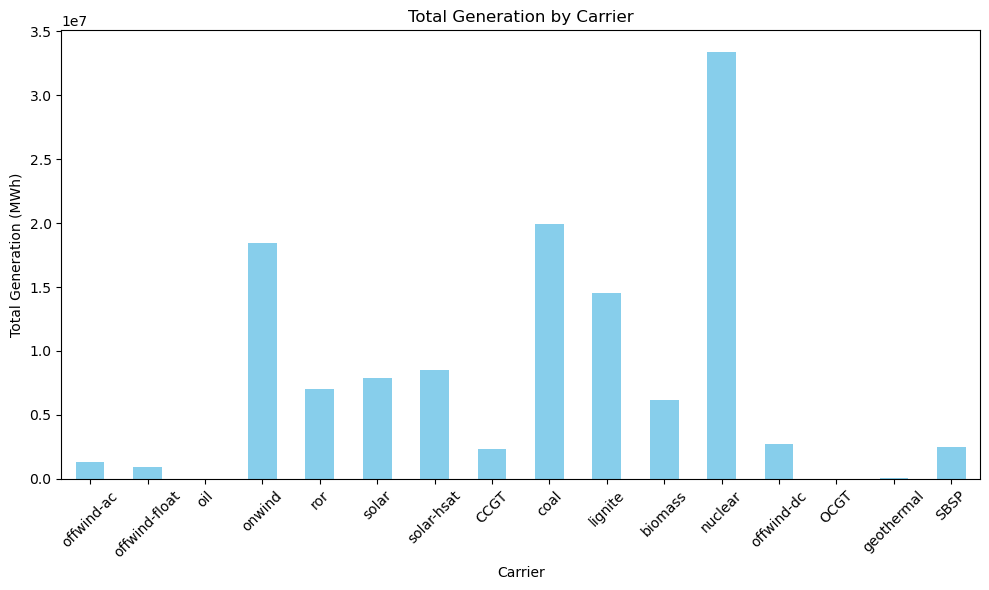

In [14]:
import matplotlib.pyplot as plt
carrier_generation.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Generation by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Total Generation (MWh)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()